In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Histogram Equalization

### 1. Load and Show images

In [2]:
def plot_standard(_img, _title):
    ## disable x & y axis
    plt.axis('off')
    plt.title(_title, color='white', backgroundcolor='blue')
    plt.imshow(_img, cmap = 'gray', vmin=0, vmax=2**(_img.itemsize*8)-1)

In [3]:
fprint_img = cv2.imread('HW2_Q4_FingerPrint.tif', cv2.IMREAD_GRAYSCALE)

data type:  uint8
dimensions:  (480, 400)


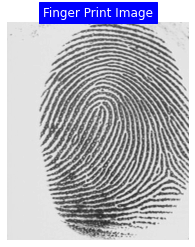

In [4]:
print('data type: ', fprint_img.dtype)
print('dimensions: ', fprint_img.shape)
plot_standard(fprint_img, 'Finger Print Image')

In [5]:
ultrafetus_img = cv2.imread('HW2_Q4_Ultrasound-Fetus.tif', cv2.IMREAD_GRAYSCALE)

data type:  uint8
dimensions:  (666, 888)


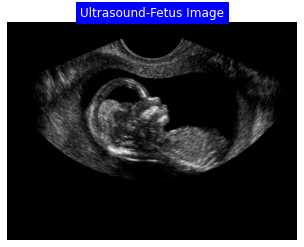

In [6]:
print('data type: ', ultrafetus_img.dtype)
print('dimensions: ', ultrafetus_img.shape)
plot_standard(ultrafetus_img, 'Ultrasound-Fetus Image')

### 2. Define histogram equalization function

#### Use the following equation to calculate the qualized histogram and image

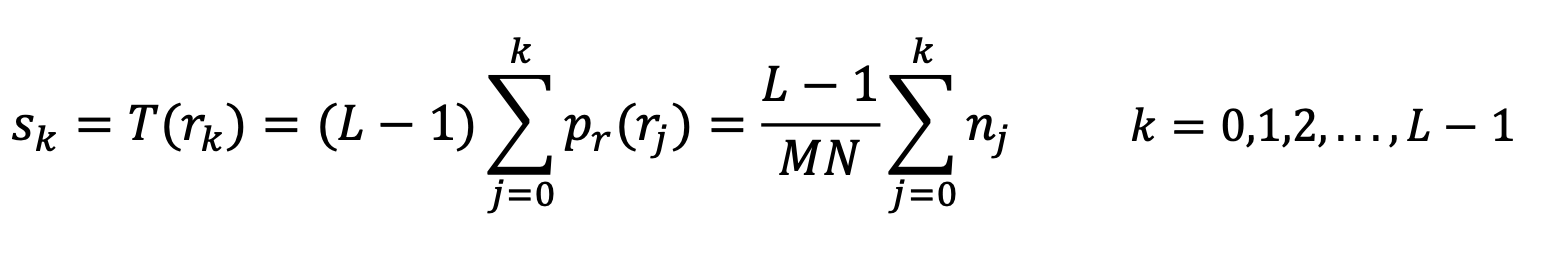

In [26]:
def histogram_equalization(_img):
    # _img = fprint_img
    n_bytes = _img.itemsize
    equalized_img = np.zeros(_img.shape, _img.dtype)
    # Calculate cumulative distribution function (cdf)
    cdf = np.zeros(2**(n_bytes*8))
    for i in range(2**(n_bytes*8)):
        cdf[i] = np.sum(_img <= i) 
    # Perform equalization
    for i in range(_img.shape[0]):
        for j in range(_img.shape[1]):
            equalized_img[i, j] = np.round((2**(n_bytes*8) - 1)*cdf[_img[i, j]] / _img.size)
    return equalized_img

In [40]:
fprint_hist_equalized = histogram_equalization(fprint_img)

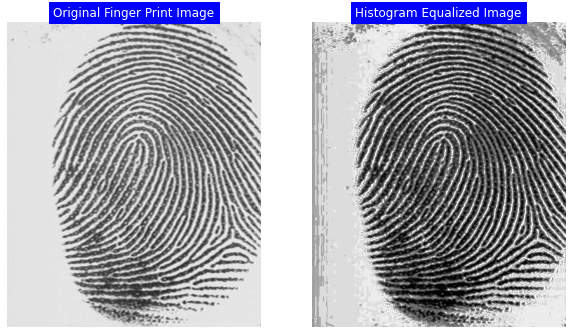

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (10, 10))

# Plot contrast stretching result
## disable x & y axis
ax[0].axis('off')
ax[0].set_title('Original Finger Print Image', color='white', backgroundcolor='blue')
ax[0].imshow(fprint_img, cmap = 'gray', vmin=0, vmax=2**(fprint_img.itemsize*8)-1)

# Plot power law result
## disable x & y axis
ax[1].axis('off')
ax[1].set_title('Histogram Equalized Image', color='white', backgroundcolor='blue')
ax[1].imshow(fprint_hist_equalized, cmap = 'gray', vmin=0, vmax=2**(fprint_hist_equalized.itemsize*8)-1)

### 3. Define CLAHE function

### TODO: explain about the clahe parameters

In [35]:
def perform_CLAHE(_img, _clipLimit, _tileGridSize):
    clahe = cv2.createCLAHE(clipLimit=_clipLimit, tileGridSize=_tileGridSize)
    clahe_img = clahe.apply(_img)
    return clahe_img

In [42]:
ultrafetus_clahe = perform_CLAHE(ultrafetus_img, 30.0, (8, 8))

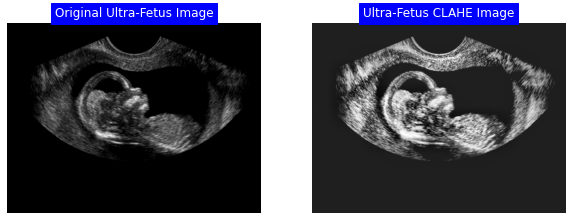

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (10, 10))

# Plot contrast stretching result
## disable x & y axis
ax[0].axis('off')
ax[0].set_title('Original Ultra-Fetus Image', color='white', backgroundcolor='blue')
ax[0].imshow(ultrafetus_img, cmap = 'gray', vmin=0, vmax=2**(ultrafetus_img.itemsize*8)-1)

# Plot power law result
## disable x & y axis
ax[1].axis('off')
ax[1].set_title('Ultra-Fetus CLAHE Image', color='white', backgroundcolor='blue')
ax[1].imshow(ultrafetus_clahe, cmap = 'gray', vmin=0, vmax=2**(ultrafetus_clahe.itemsize*8)-1)

### 4. Apply histogram equalization and CLAHE functions on the two images

#### Finger Print

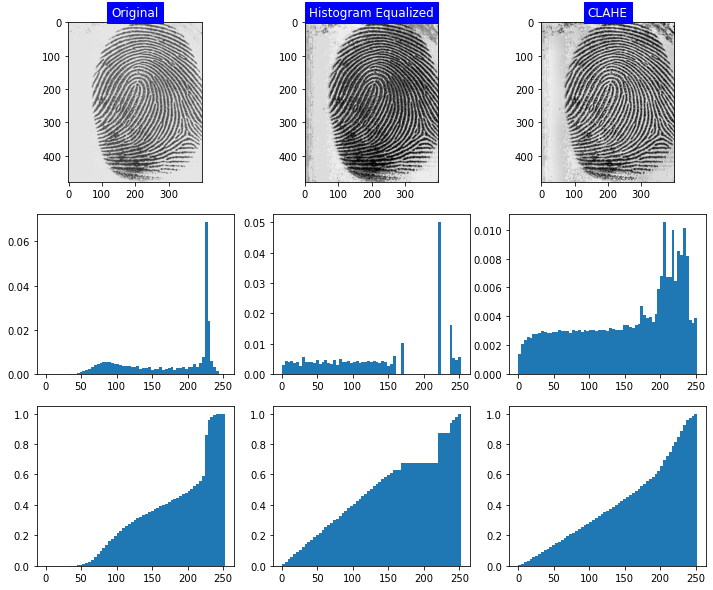

In [54]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(3, 3)

# original image
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(fprint_img, cmap='gray', vmin=0, vmax=2**(fprint_img.itemsize*8)-1)
ax1.set_title('Original', color='white', backgroundcolor='blue')

# histogram equalization
fprint_hist_equalized = histogram_equalization(fprint_img)
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(fprint_hist_equalized, cmap='gray', vmin=0, vmax=2**(fprint_hist_equalized.itemsize*8)-1)
ax2.set_title('Histogram Equalized', color='white', backgroundcolor='blue')

# CLAHE
fprint_clahe = perform_CLAHE(fprint_img, 30.0, (8, 8))
ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(fprint_clahe, cmap='gray', vmin=0, vmax=2**(fprint_clahe.itemsize*8)-1)
ax3.set_title('CLAHE', color='white', backgroundcolor='blue')

# Hist
ax4 = fig.add_subplot(gs[1, 0])
ax4.hist(fprint_img.ravel(), bins=[i for i in range(0, 2**(fprint_img.itemsize*8), 4)], density = True)
ax5 = fig.add_subplot(gs[1, 1])
ax5.hist(fprint_hist_equalized.ravel(), bins=[i for i in range(0, 2**(fprint_hist_equalized.itemsize*8), 4)], density = True)
ax6 = fig.add_subplot(gs[1, 2])
ax6.hist(fprint_clahe.ravel(), bins=[i for i in range(0, 2**(fprint_clahe.itemsize*8), 4)], density = True)

# Cumulative Distribution Function (CDF) 
ax7 = fig.add_subplot(gs[2, 0])
ax7.hist(fprint_img.ravel(), bins=[i for i in range(0, 2**(fprint_img.itemsize*8), 4)], density = True, cumulative = True)
ax8 = fig.add_subplot(gs[2, 1])
ax8.hist(fprint_hist_equalized.ravel(), bins=[i for i in range(0, 2**(fprint_hist_equalized.itemsize*8), 4)], density = True, cumulative = True)
ax9 = fig.add_subplot(gs[2, 2])
ax9.hist(fprint_clahe.ravel(), bins=[i for i in range(0, 2**(fprint_clahe.itemsize*8), 4)], density = True, cumulative = True)

plt.show();

#### Ultrasound-Fetus

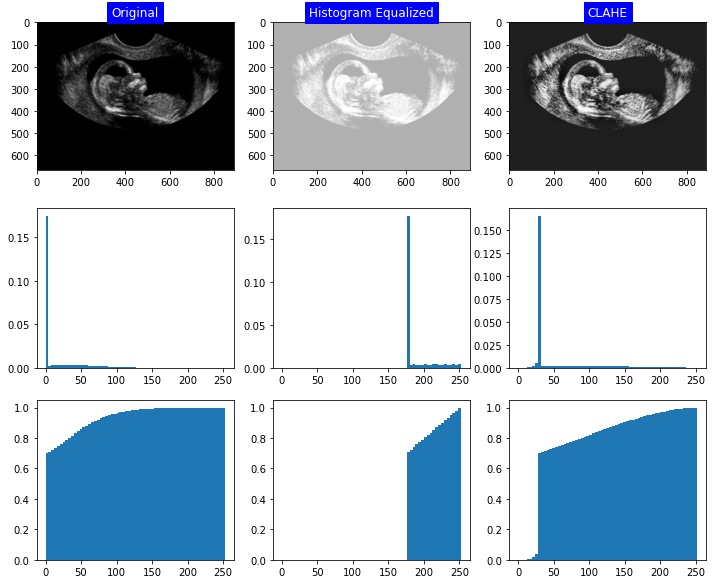

In [53]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(3, 3)

# original image
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(ultrafetus_img, cmap='gray', vmin=0, vmax=2**(ultrafetus_img.itemsize*8)-1)
ax1.set_title('Original', color='white', backgroundcolor='blue')

# histogram equalization
ultrafetus_hist_equalized = histogram_equalization(ultrafetus_img)
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(ultrafetus_hist_equalized, cmap='gray', vmin=0, vmax=2**(ultrafetus_hist_equalized.itemsize*8)-1)
ax2.set_title('Histogram Equalized', color='white', backgroundcolor='blue')

# CLAHE
ultrafetus_clahe = perform_CLAHE(ultrafetus_img, 30.0, (8, 8))
ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(ultrafetus_clahe, cmap='gray', vmin=0, vmax=2**(ultrafetus_clahe.itemsize*8)-1)
ax3.set_title('CLAHE', color='white', backgroundcolor='blue')

# Hist
ax4 = fig.add_subplot(gs[1, 0])
ax4.hist(ultrafetus_img.ravel(), bins=[i for i in range(0, 2**(ultrafetus_img.itemsize*8), 4)], density = True)
ax5 = fig.add_subplot(gs[1, 1])
ax5.hist(ultrafetus_hist_equalized.ravel(), bins=[i for i in range(0, 2**(ultrafetus_hist_equalized.itemsize*8), 4)], density = True)
ax6 = fig.add_subplot(gs[1, 2])
ax6.hist(ultrafetus_clahe.ravel(), bins=[i for i in range(0, 2**(ultrafetus_clahe.itemsize*8), 4)], density = True)

# Cumulative Distribution Function (CDF) 
ax7 = fig.add_subplot(gs[2, 0])
ax7.hist(ultrafetus_img.ravel(), bins=[i for i in range(0, 2**(ultrafetus_img.itemsize*8), 4)], density = True, cumulative = True)
ax8 = fig.add_subplot(gs[2, 1])
ax8.hist(ultrafetus_hist_equalized.ravel(), bins=[i for i in range(0, 2**(ultrafetus_hist_equalized.itemsize*8), 4)], density = True, cumulative = True)
ax9 = fig.add_subplot(gs[2, 2])
ax9.hist(ultrafetus_clahe.ravel(), bins=[i for i in range(0, 2**(ultrafetus_clahe.itemsize*8), 4)], density = True, cumulative = True)

plt.show();